In [7]:
#Imported packages for use tldr: seaborn, pandas, nltk, numpy
import re
import sys
print(sys.executable)
import os
import seaborn as sns
import pandas as pd
import nltk
import numpy as np
import warnings
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
nltk.download('punkt')
import wordcloud
from wordcloud import WordCloud, STOPWORDS

/opt/anaconda3/bin/python


[nltk_data] Downloading package punkt to /Users/daleyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", names = ["target", "ids", "date", "flag", "user", "text"])

In [9]:
print(data.head())

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [10]:
#lets drop the columns we dont need like ids, date, flag, user
data = data.drop(["ids", "date", "flag", "user"], axis=1)
print(data.head())

   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....


In [11]:
import sklearn
from sklearn.model_selection import train_test_split
#split dataset with a ratio of 20 to 80
train, test = train_test_split(data, test_size=0.2, random_state=42)

#we don't care about neutral tweets
train = train[train.target != 2]
test = test[test.target != 2]


Positive words


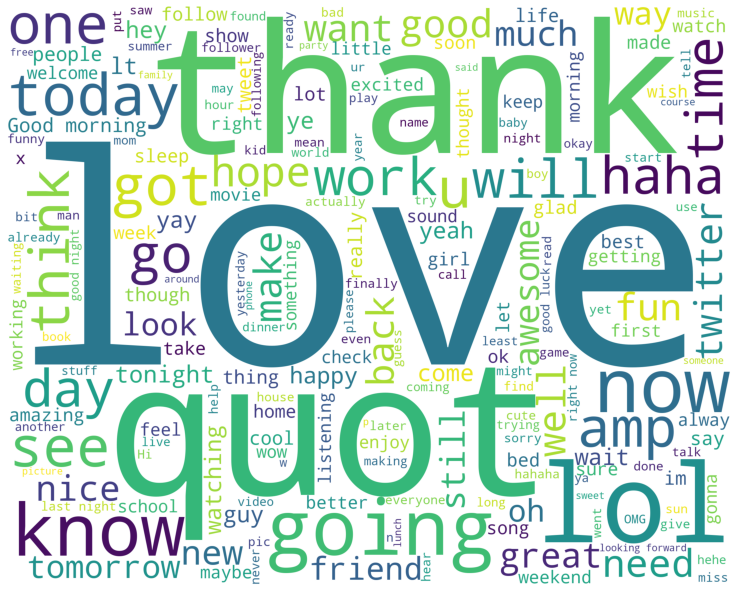

Negative words


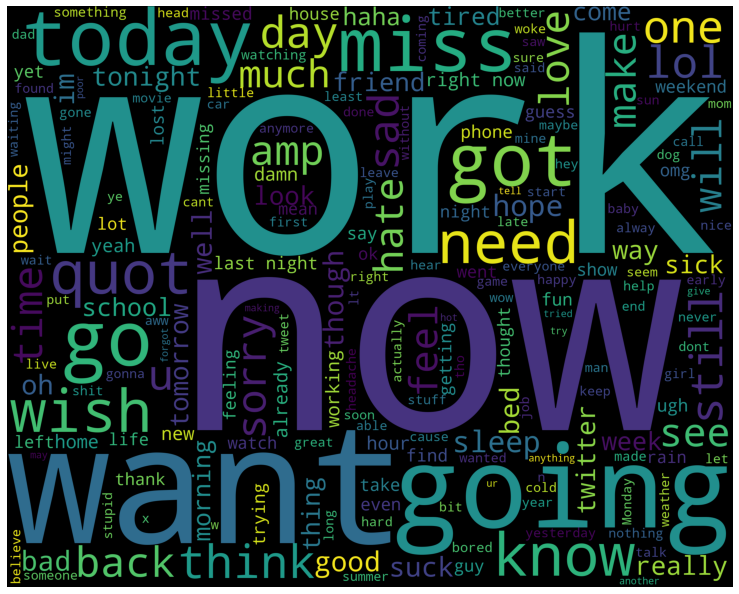

In [12]:
#sepreate positive and negative tweets

train_positive = train[ (train['target'] == 4) | (train['target'] == 3)]
train_positive = train_positive['text']

train_negative = train[ (train['target'] == 0) | (train['target'] == 1)]
train_negative = train_negative['text']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_positive,'white')
print("Negative words")
wordcloud_draw(train_negative)

In [13]:
CLEANER = re.compile('<(?!\/(?=>|\s.*>))\/?.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
def help_clean(html):
    clean = re.sub(CLEANER,' ',html)
    return clean

#A stand alone number has no importance, so check if it can be removed.
def is_number(s):
    try:
        float(s) #if the word can be casted as float it is a number
        return True
    except ValueError:
        return False

#Helper method for now that reduces vocabulary by getting rid of all numbers
def contains_number(s):
    return any(char.isdigit() for char in s)

In [15]:
def custom_tokenize(text):
    #input: takes in text from one entry
    #output: returns list of tokens
    if not text:
        #print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    text = help_clean(text)    
    return [word.lower() for word in word_tokenize(text)  if not is_number(word) and not contains_number(word)]

#Create a new column of the dataframe that is tokenized

#data['tokenized'] =data.apply(lambda row: custom_tokenize(row['text']), axis=1)
#data['sents_length'] = data.apply(lambda row: len(row['tokenized']), axis=1)
#print(data['tokenized'])

In [17]:
nltk.download('stopwords')

punc = {'!','"','#','$','%','&','(',')','/',':',';','?','@','[',']','^','_','\\','-','*',"'",'&','<','>','**','***','****','*****'}
stopwords_json = {"en":["/a","a","a's","able","about","above","according","accordingly","across","href=https","href","http","https","href=http"
,"actually","after","afterwards","again","against","ain't","all","allow","allows","almost","nbsp", "...", "=", "databy=day"
,"alone","along","already","also","although","always","am","among","amongst","an","and","another",",",".","+"
,"any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate"
,"appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available"
,"away","awfully","b","be","became","because","become","becomes","becoming","been","before"
,"beforehand","behind","being","believe","below","beside","besides","best","better","between"
,"beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant"
,"cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning"
,"consequently","consider","considering","contain","containing","contains","corresponding","could"
,"couldn't","course","currently","d","definitely","described","despite","did","didn't","different"
,"do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg"
,"eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever"
,"every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f"
,"far","few","fifth","first","five","followed","following","follows","for","former","formerly"
,"forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go"
,"goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has"
,"hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's"
,"hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither"
,"hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate"
,"in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead"
,"into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep"
,"keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least"
,"less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd"
,"m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most"
,"mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs"
,"neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally"
,"not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on"
,"once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out"
,"outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus"
,"possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really"
,"reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same"
,"saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen"
,"self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should"
,"shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes"
,"somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup"
,"sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's"
,"thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby"
,"therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think"
,"third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to"
,"together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un"
,"under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses"
,"using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't"
,"way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever"
,"when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever"
,"whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing"
,"wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet"
,"you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en,punc)

def remove_stop(tokens):
    #input: list of tokens 
    #output list of tokens only if they don't occur in the set of stopwords
    return [word for word in tokens if word not in stoplist_combined]

#test to make sure that method works
#data['no_stops'] = data.apply(lambda row: remove_stop(row['tokenized']), axis=1)
#print(data['no_stops'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daleyu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
#lemmanization and pos tagging
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    #Converts Penn Treebank tags
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
def lemmatize_sent(text): 
    # Input: Text input is string, 
    # Output: lowercased lemmanized strings in a list.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(custom_tokenize(text))] #uses the nltk package to mark part of speech for each word in text

In [19]:
#preprocessing code before vectorizing, involves tokenizing, removing stops, and lemmanizing
def preprocess_text(text):
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    return [word for word in lemmatize_sent(text) 
            if word not in stoplist_combined
            and not word.isdigit()]


## Start creating the Vector Space model for classfication
Sklearn and stringIO packages 

In [22]:
#Vector Space Model
from io import StringIO
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
#Use training Data, with machine tagging to help classify
with StringIO(train['text'].to_string()) as fin:
    count_vectorizer = CountVectorizer(analyzer=preprocess_text, ngram_range=(1,2))
    train_vectorized = count_vectorizer.fit_transform(fin)

train_tag = train['target']
valid_vectors = count_vectorizer.transform(test['text'])
valid_tag = test['target']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/daleyu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/daleyu/nltk_data...


In [23]:
#import sklearn naive bayes classifier
import sklearn
import sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB
#gn = BernoulliNB()
from sklearn.naive_bayes import GaussianNB
#gn = GaussianNB()
from sklearn.naive_bayes import ComplementNB

gn = ComplementNB()
gn.fit(train_vectorized, train_tag) 

from sklearn.metrics import accuracy_score

predictions_valid = gn.predict(valid_vectors)

print('Tagging accuracy = {}'.format(
        accuracy_score(predictions_valid, valid_tag) * 100)
     )

Tagging accuracy = 74.88125


Lets use a tf-idf transformation to get a better classification model

In [24]:
## Get the TF-IDF vector representation of the data
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
training_tfidf = tfidf_transformer.fit_transform(train_vectorized)
print ('Dimension of TF-IDF vector :' , training_tfidf.shape)

Dimension of TF-IDF vector : (1280000, 433864)


In [25]:
# Accuracy score is not enough, we need to perform recall, fscore, precision
# I create a confusion matrix and calculate scores from that precision
def confusion_matrix_and_score_pth(y,ypredicted):
    
    #The lenth of y and ypredicted must have the same length
    if(len(y)!=len(ypredicted)):
        return "Found input variables with inconsistent numbers of samples",len(y),len(ypredicted)
    
    uniq_element     = (set(y)|set(ypredicted))
    
    
    #Creating a dictionary in order to be sure in adding to the matrix
    dictionary = {}
    count = 0
    
    for _ in uniq_element:
        dictionary[_] = count
        count = count+1
    list_predictions = list(uniq_element)
    #Changing class labels
    y = [dictionary.get(_) for _ in y]
    ypredicted = [dictionary.get(_) for _ in ypredicted]
    #print(y)
    actual_tags = {}
    for i in y:
        if list_predictions[i] not in actual_tags:
            actual_tags[list_predictions[i]] = 1
        else:
            actual_tags[list_predictions[i]] += 1
    print("Actual Tag Counts:",actual_tags)

    predicted = {}
    for i in ypredicted:
        if list_predictions[i] not in predicted:
            predicted[list_predictions[i]] = 1
        else:
            predicted[list_predictions[i]] += 1
    print("\n Predicted Tag Counts:",predicted)

    #Declaring necessary variables
    length          = len(uniq_element)
    confusion_matrix = np.zeros((length,length))
    correct_tokens   = 0
    recall           = 0
    precision        = 0
    
    #Creating confusion matrix
    for i,j in zip(y,ypredicted):
        confusion_matrix[i][j] += 1
     
    #Calculating accuracy, recall and f1 score  
    vertical_summation = confusion_matrix.sum(axis=0)
    horizontal_summation = confusion_matrix.sum(axis=1)
    for _ in range (confusion_matrix.shape[0]):
        correct_tokens += confusion_matrix[_][_]
        if (vertical_summation[_] != 0):
            recall += confusion_matrix[_][_]/vertical_summation[_]
        if (horizontal_summation[_]  != 0):
            precision += confusion_matrix[_][_]/horizontal_summation[_]
    
    accuracy  = correct_tokens/np.sum(confusion_matrix)
    recall    = recall/confusion_matrix.shape[0]
    precision = precision/confusion_matrix.shape[0]
    
    f_score = (2*recall*precision)/(recall+precision)
    #print("Input Class Labels:Class labels for this method",dictionary)
    print('Confusion matrix is')
    #np.set_printoptions(threshold=sys.maxsize, suppress = True)
    np.set_printoptions()
    print(confusion_matrix)
    print("Accuracy Score is ", accuracy*100,'%')
    print("Recall Score is ", recall*100,'%')
    print("Precision Score is ", precision*100,'%')
    print("FScore is ", f_score*100,'%')


    #Confusion Matrix Graph
    import seaborn as sns

    ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Tags by Index')
    ax.set_ylabel('Actual Tags By Index ')

    ## Ticket labels - List must be in alphabetical order

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [26]:
cp = ComplementNB()
gn.fit(training_tfidf, train_tag) 
predictions_valid = gn.predict(valid_vectors)

Actual Tag Counts: {0: 159494, 4: 160506}

 Predicted Tag Counts: {4: 139908, 0: 180092}
Confusion matrix is
[[129167.  30327.]
 [ 50925. 109581.]]
Accuracy Score is  74.60875 %
Recall Score is  75.0231993956403 %
Precision Score is  74.62885287003802 %
FScore is  74.8255065636789 %


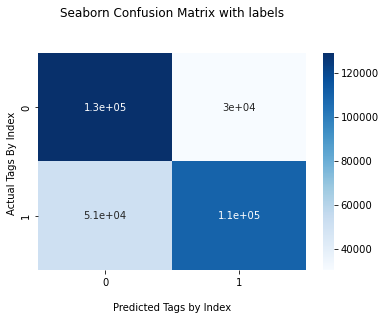

In [27]:
#Confusion Matrix on training data
confusion_matrix_and_score_pth(valid_tag,predictions_valid)

### Doc2Vec

In [29]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#use a smaller database so it is easier to train
test['Processed'] = data.apply(lambda row: preprocess_text(row['text']), axis=1)


elog_corpus = []
for id,row in enumerate(test['Processed']):       
    elog_corpus.append(
        gensim.models.doc2vec.TaggedDocument(row,[id] )
    )
#print(list(elog_corpus[:10]))
elog_corpus = list(elog_corpus)
print(elog_corpus[:10])

ModuleNotFoundError: No module named 'gensim'